In [5]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd

path = "sum/iterative/{}/measurements/{}{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []

sum_max_mem = []
sum_avg_mem = []
sum_max_mem_std = []
sum_avg_mem_std = []
sum_constraints = []
sum_gas = []
sum_vk_size = []
sum_pk_size = []
sum_verifier_compiled_size = []
sum_verifier_size = []
sum_times = []

measurements = ["compilation", "witness", "setup", "proof"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index, batch_size in enumerate(batch_sizes):
        df1 = pd.read_csv(path.format(batch_numbers[index], measure, 1), header=None)
        df2 = pd.read_csv(path.format(batch_numbers[index], measure, 2), header=None)
        df3 = pd.read_csv(path.format(batch_numbers[index], measure, 3), header=None)

        max1 = round(np.max(df1[1] * 1.024e-6),3)
        max2 = round(np.max(df2[1] * 1.024e-6),3)
        max3 = round(np.max(df3[1] * 1.024e-6),3)

        max_all.append(round((max1 + max2 + max3) / 3, 3))

        avg1 = round(np.average(df1[1] * 1.024e-6),3)
        avg2 = round(np.average(df2[1] * 1.024e-6),3)
        avg3 = round(np.average(df3[1] * 1.024e-6),3)

        avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))

        std_max.append(round(np.std([max1, max2, max3]), 3))

        std_avg.append(round(np.std([avg1, avg2, avg3]), 3))

        time1 = round(df1[0].iloc[-1] / 1000, 3)
        time2 = round(df2[0].iloc[-1] / 1000, 3)
        time3 = round(df3[0].iloc[-1] / 1000, 3)

        time_all.append(round((time1 + time2 + time3) / 3, 3))

    summary = pd.read_csv("sum/iterative/sum.txt")

    summary["time"] = time_all
    summary["max_mem"] = max_all
    summary["max_mem_std"] = std_max
    summary["avg_mem"] = avg_all
    summary["avg_mem_std"] = std_avg
    
    #display(np.transpose(summary))
    
    sum_max_mem.append([(item / 1.024e-6) * 1024  for item in summary["max_mem"].tolist()])
    sum_avg_mem.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem"].tolist()])
    sum_max_mem_std.append([(item / 1.024e-6) * 1024  for item in summary["max_mem_std"].tolist()])
    sum_avg_mem_std.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem_std"].tolist()])
    sum_constraints.append(summary["constraints"].tolist())
    sum_gas.append(summary["deployment_gas"].tolist())
    sum_vk_size.append(summary["verification_key_size"].tolist())
    sum_pk_size.append(summary["proving_key_size"].tolist())
    sum_verifier_size.append(summary["verifier_size"].tolist())
    sum_verifier_compiled_size.append(summary["compiled_verifier"].tolist())
    sum_times.append(summary["time"].tolist())
    #print(sum_max_mem)
    
    max_all = []
    avg_all = []
    std_max = []
    std_avg = []
    time_all = []

In [6]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "min/iterative/{}/measurements/{}{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []

min_max_mem = []
min_avg_mem = []
min_max_mem_std = []
min_avg_mem_std = []
min_constraints = []
min_gas = []
min_vk_size = []
min_pk_size = []
min_verifier_compiled_size = []
min_verifier_size = []
min_times = []

measurements = ["compilation", "witness", "setup", "proof"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index, batch_size in enumerate(batch_sizes):
        df1 = pd.read_csv(path.format(batch_numbers[index], measure, 1), header=None)
        df2 = pd.read_csv(path.format(batch_numbers[index], measure, 2), header=None)
        df3 = pd.read_csv(path.format(batch_numbers[index], measure, 3), header=None)

        max1 = round(np.max(df1[1] * 1.024e-6),3)
        max2 = round(np.max(df2[1] * 1.024e-6),3)
        max3 = round(np.max(df3[1] * 1.024e-6),3)

        max_all.append(round((max1 + max2 + max3) / 3, 3))

        avg1 = round(np.average(df1[1] * 1.024e-6),3)
        avg2 = round(np.average(df2[1] * 1.024e-6),3)
        avg3 = round(np.average(df3[1] * 1.024e-6),3)

        avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))

        std_max.append(round(np.std([max1, max2, max3]), 3))

        std_avg.append(round(np.std([avg1, avg2, avg3]), 3))

        time1 = round(df1[0].iloc[-1] / 1000, 3)
        time2 = round(df2[0].iloc[-1] / 1000, 3)
        time3 = round(df3[0].iloc[-1] / 1000, 3)

        time_all.append(round((time1 + time2 + time3) / 3, 3))

    summary = pd.read_csv("min/iterative/min.txt")

    summary["time"] = time_all
    summary["max_mem"] = max_all
    summary["max_mem_std"] = std_max
    summary["avg_mem"] = avg_all
    summary["avg_mem_std"] = std_avg
    
    #display(np.transpose(summary))
    
    min_max_mem.append([(item / 1.024e-6) * 1024  for item in summary["max_mem"].tolist()])
    min_avg_mem.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem"].tolist()])
    min_max_mem_std.append([(item / 1.024e-6) * 1024  for item in summary["max_mem_std"].tolist()])
    min_avg_mem_std.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem_std"].tolist()])
    min_constraints.append(summary["constraints"].tolist())
    min_gas.append(summary["deployment_gas"].tolist())
    min_vk_size.append(summary["verification_key_size"].tolist())
    min_pk_size.append(summary["proving_key_size"].tolist())
    min_verifier_size.append(summary["verifier_size"].tolist())
    min_verifier_compiled_size.append(summary["compiled_verifier"].tolist())
    min_times.append(summary["time"].tolist())
    #print(min_max_mem)
    
    max_all = []
    avg_all = []
    std_max = []
    std_avg = []
    time_all = []

In [7]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "min/merkle/{}/measurements/{}{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []

min_max_mem_merkle = []
min_avg_mem_merkle = []
min_max_mem_std_merkle = []
min_avg_mem_std_merkle = []
min_constraints_merkle = []
min_gas_merkle = []
min_vk_size_merkle = []
min_pk_size_merkle = []
min_verifier_compiled_size_merkle = []
min_verifier_size_merkle = []
min_times_merkle = []

measurements = ["compilation", "witness", "setup", "proof"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index, batch_size in enumerate(batch_sizes):
        df1 = pd.read_csv(path.format(batch_numbers[index], measure, 1), header=None)
        df2 = pd.read_csv(path.format(batch_numbers[index], measure, 2), header=None)
        df3 = pd.read_csv(path.format(batch_numbers[index], measure, 3), header=None)

        max1 = round(np.max(df1[1] * 1.024e-6),3)
        max2 = round(np.max(df2[1] * 1.024e-6),3)
        max3 = round(np.max(df3[1] * 1.024e-6),3)

        max_all.append(round((max1 + max2 + max3) / 3, 3))

        avg1 = round(np.average(df1[1] * 1.024e-6),3)
        avg2 = round(np.average(df2[1] * 1.024e-6),3)
        avg3 = round(np.average(df3[1] * 1.024e-6),3)

        avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))

        std_max.append(round(np.std([max1, max2, max3]), 3))

        std_avg.append(round(np.std([avg1, avg2, avg3]), 3))

        time1 = round(df1[0].iloc[-1] / 1000, 3)
        time2 = round(df2[0].iloc[-1] / 1000, 3)
        time3 = round(df3[0].iloc[-1] / 1000, 3)

        time_all.append(round((time1 + time2 + time3) / 3, 3))

    summary = pd.read_csv("min/merkle/min.txt")

    summary["time"] = time_all
    summary["max_mem"] = max_all
    summary["max_mem_std"] = std_max
    summary["avg_mem"] = avg_all
    summary["avg_mem_std"] = std_avg
    
    #display(np.transpose(summary))
    
    min_max_mem_merkle.append([(item / 1.024e-6) * 1024  for item in summary["max_mem"].tolist()])
    min_avg_mem_merkle.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem"].tolist()])
    min_max_mem_std_merkle.append([(item / 1.024e-6) * 1024  for item in summary["max_mem_std"].tolist()])
    min_avg_mem_std_merkle.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem_std"].tolist()])
    min_constraints_merkle.append(summary["constraints"].tolist())
    min_gas_merkle.append(summary["deployment_gas"].tolist())
    min_vk_size_merkle.append(summary["verification_key_size"].tolist())
    min_pk_size_merkle.append(summary["proving_key_size"].tolist())
    min_verifier_size_merkle.append(summary["verifier_size"].tolist())
    min_verifier_compiled_size_merkle.append(summary["compiled_verifier"].tolist())
    min_times_merkle.append(summary["time"].tolist())
    #print(min_max_mem_merkle)
    
    max_all = []
    avg_all = []
    std_max = []
    std_avg = []
    time_all = []

In [8]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "sum/merkle/{}/measurements/{}{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []

sum_max_mem_merkle = []
sum_avg_mem_merkle = []
sum_max_mem_std_merkle = []
sum_avg_mem_std_merkle = []
sum_constraints_merkle = []
sum_gas_merkle = []
sum_vk_size_merkle = []
sum_pk_size_merkle = []
sum_verifier_compiled_size_merkle = []
sum_verifier_size_merkle = []
sum_times_merkle = []

measurements = ["compilation", "witness", "setup", "proof"]

for index0, measure in enumerate(measurements):
    #print(measure)
    for index, batch_size in enumerate(batch_sizes):
        df1 = pd.read_csv(path.format(batch_numbers[index], measure, 1), header=None)
        df2 = pd.read_csv(path.format(batch_numbers[index], measure, 2), header=None)
        df3 = pd.read_csv(path.format(batch_numbers[index], measure, 3), header=None)

        max1 = round(np.max(df1[1] * 1.024e-6),3)
        max2 = round(np.max(df2[1] * 1.024e-6),3)
        max3 = round(np.max(df3[1] * 1.024e-6),3)

        max_all.append(round((max1 + max2 + max3) / 3, 3))

        avg1 = round(np.average(df1[1] * 1.024e-6),3)
        avg2 = round(np.average(df2[1] * 1.024e-6),3)
        avg3 = round(np.average(df3[1] * 1.024e-6),3)

        avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))

        std_max.append(round(np.std([max1, max2, max3]), 3))

        std_avg.append(round(np.std([avg1, avg2, avg3]), 3))

        time1 = round(df1[0].iloc[-1] / 1000, 3)
        time2 = round(df2[0].iloc[-1] / 1000, 3)
        time3 = round(df3[0].iloc[-1] / 1000, 3)

        time_all.append(round((time1 + time2 + time3) / 3, 3))

    summary = pd.read_csv("sum/merkle/sum.txt")

    summary["time"] = time_all
    summary["max_mem"] = max_all
    summary["max_mem_std"] = std_max
    summary["avg_mem"] = avg_all
    summary["avg_mem_std"] = std_avg
    
    #display(np.transpose(summary))
    
    sum_max_mem_merkle.append([(item / 1.024e-6) * 1024  for item in summary["max_mem"].tolist()])
    sum_avg_mem_merkle.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem"].tolist()])
    sum_max_mem_std_merkle.append([(item / 1.024e-6) * 1024  for item in summary["max_mem_std"].tolist()])
    sum_avg_mem_std_merkle.append([(item / 1.024e-6) * 1024  for item in summary["avg_mem_std"].tolist()])
    sum_constraints_merkle.append(summary["constraints"].tolist())
    sum_gas_merkle.append(summary["deployment_gas"].tolist())
    sum_vk_size_merkle.append(summary["verification_key_size"].tolist())
    sum_pk_size_merkle.append(summary["proving_key_size"].tolist())
    sum_verifier_size_merkle.append(summary["verifier_size"].tolist())
    sum_verifier_compiled_size_merkle.append(summary["compiled_verifier"].tolist())
    sum_times_merkle.append(summary["time"].tolist())
    #print(sum_constraints_merkle)
    
    max_all = []
    avg_all = []
    std_max = []
    std_avg = []
    time_all = []

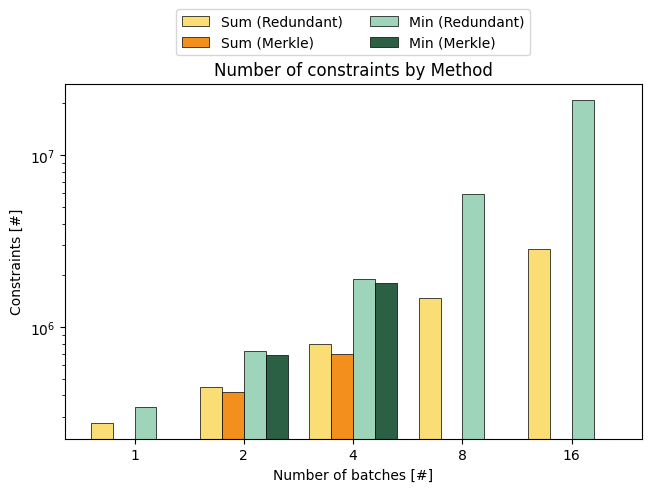

In [67]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_constraints[0]),
    'Sum (Merkle)': ([0, sum_constraints_merkle[0][0], sum_constraints_merkle[0][1], 0, 0]),
    'Min (Redundant)': (min_constraints[0]),
    'Min (Merkle)': ([0, min_constraints_merkle[0][0], min_constraints_merkle[0][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Constraints [#]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Number of constraints by Method')
ax.set_xticks(x + 1.5* width, species)
#ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

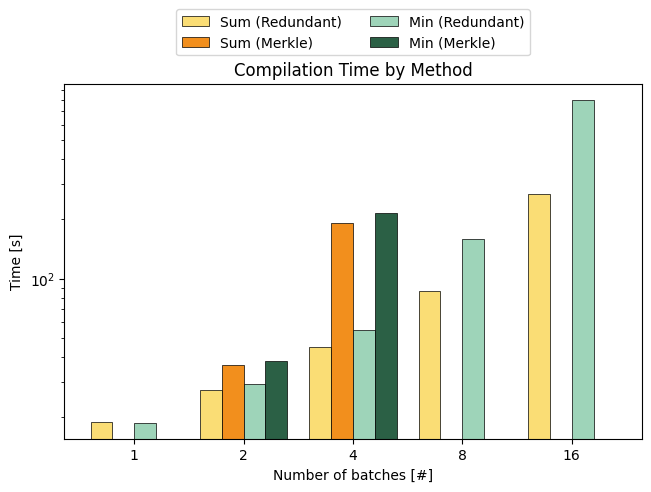

In [68]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_times[0]),
    'Sum (Merkle)': ([0, sum_times_merkle[0][0], sum_times_merkle[0][1], 0, 0]),
    'Min (Redundant)': (min_times[0]),
    'Min (Merkle)': ([0, min_times_merkle[0][0], min_times_merkle[0][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Compilation Time by Method')
ax.set_xticks(x + 1.5*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

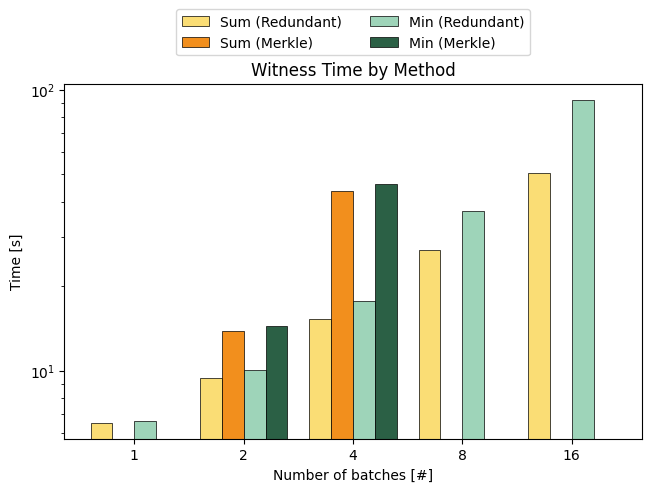

In [69]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_times[1]),
    'Sum (Merkle)': ([0, sum_times_merkle[1][0], sum_times_merkle[1][1], 0, 0]),
    'Min (Redundant)': (min_times[1]),
    'Min (Merkle)': ([0, min_times_merkle[1][0], min_times_merkle[1][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Witness Time by Method')
ax.set_xticks(x + 1.5*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

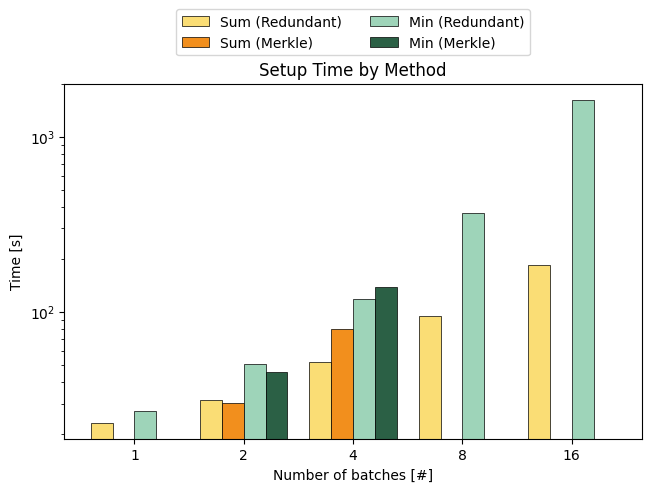

In [70]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_times[2]),
    'Sum (Merkle)': ([0, sum_times_merkle[2][0], sum_times_merkle[2][1], 0, 0]),
    'Min (Redundant)': (min_times[2]),
    'Min (Merkle)': ([0, min_times_merkle[2][0], min_times_merkle[2][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Setup Time by Method')
ax.set_xticks(x + 1.5*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

[17.128, 21.395, 36.347, 70.193, 146.997]
[17.414, 28.496, 58.739, 183.42, 908.794]


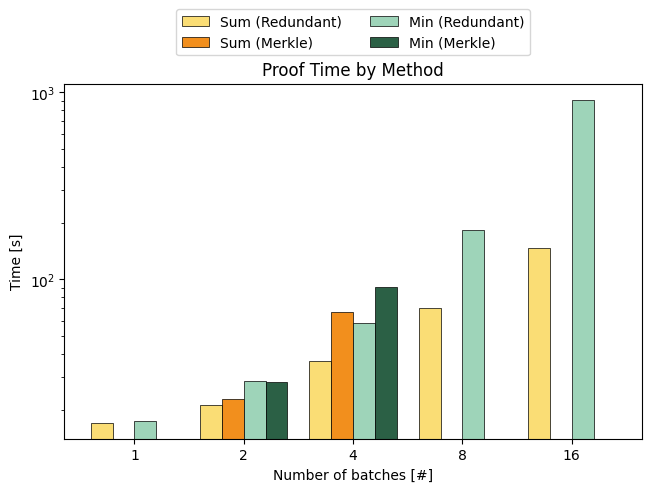

In [71]:
import matplotlib.pyplot as plt
import numpy as np

print(sum_times[3])
print(min_times[3])
species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_times[3]),
    'Sum (Merkle)': ([0, sum_times_merkle[3][0], sum_times_merkle[3][1], 0, 0]),
    'Min (Redundant)': (min_times[3]),
    'Min (Merkle)': ([0, min_times_merkle[3][0], min_times_merkle[3][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time [s]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Proof Time by Method')
ax.set_xticks(x + 1.5*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

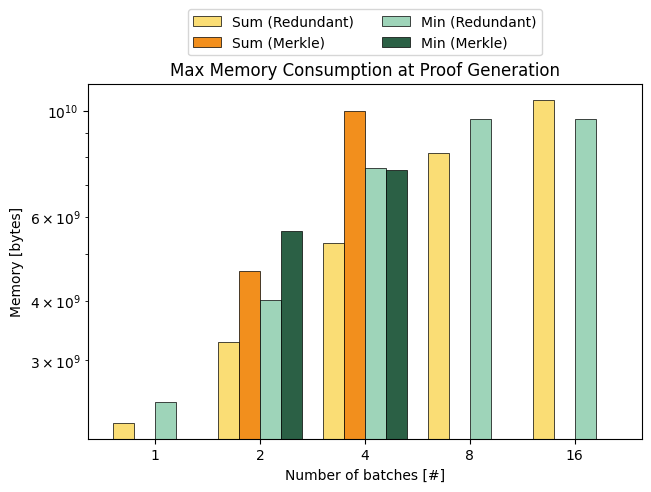

In [73]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_max_mem[3]),
    'Sum (Merkle)': ([0, sum_max_mem_merkle[3][0], sum_max_mem_merkle[3][1], 0, 0]),
    'Min (Redundant)': (min_max_mem[3]),
    'Min (Merkle)': ([0, min_max_mem_merkle[3][0], min_max_mem_merkle[3][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory [bytes]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Max Memory Consumption at Proof Generation')
ax.set_xticks(x + 1.5*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

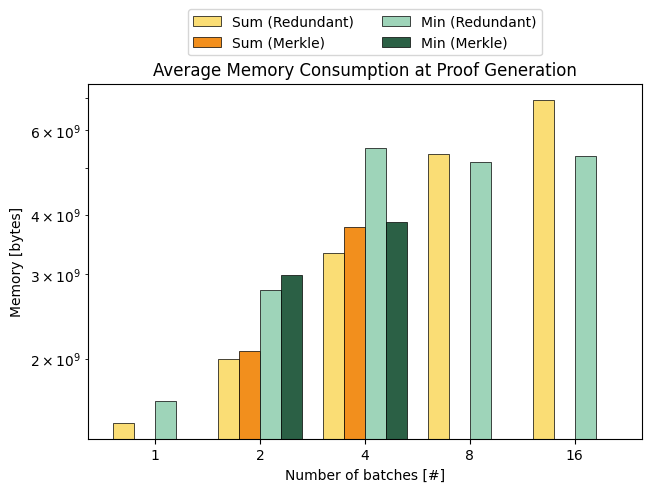

In [74]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_avg_mem[3]),
    'Sum (Merkle)': ([0, sum_avg_mem_merkle[3][0], sum_avg_mem_merkle[3][1], 0, 0]),
    'Min (Redundant)': (min_avg_mem[3]),
    'Min (Merkle)': ([0, min_avg_mem_merkle[3][0], min_avg_mem_merkle[3][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Memory [bytes]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Average Memory Consumption at Proof Generation')
ax.set_xticks(x + 1.5*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

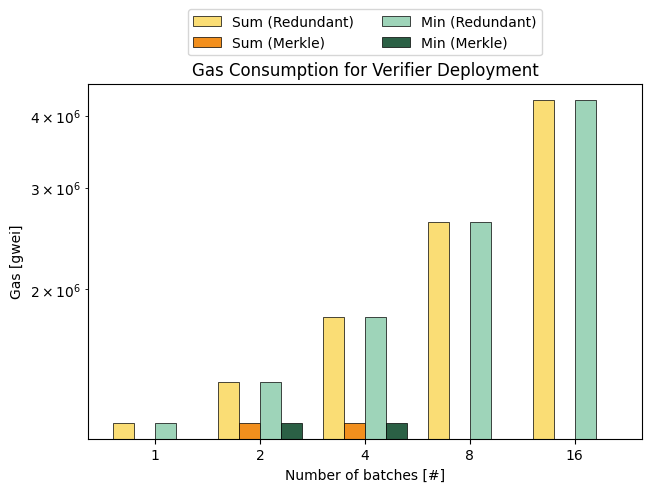

In [75]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_gas[0]),
    'Sum (Merkle)': ([0, sum_gas_merkle[0][0], sum_gas_merkle[0][1], 0, 0]),
    'Min (Redundant)': (min_gas[0]),
    'Min (Merkle)': ([0, min_gas_merkle[0][0], min_gas_merkle[0][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gas [gwei]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Gas Consumption for Verifier Deployment')
ax.set_xticks(x + 1.5*width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

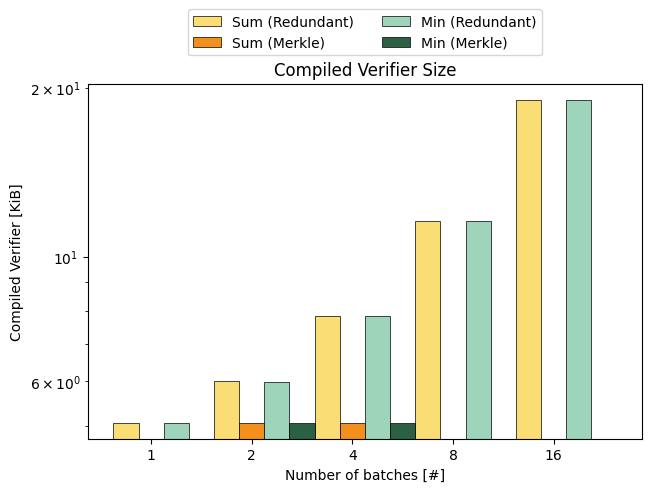

In [77]:
import matplotlib.pyplot as plt
import numpy as np

species = ("1", "2", "4", "8", "16")
penguin_means = {
    'Sum (Redundant)': (sum_verifier_compiled_size[0]),
    'Sum (Merkle)': ([0, sum_verifier_compiled_size_merkle[0][0], sum_verifier_compiled_size_merkle[0][1], 0, 0]),
    'Min (Redundant)': (min_verifier_compiled_size[0]),
    'Min (Merkle)': ([0, min_verifier_compiled_size_merkle[0][0], min_verifier_compiled_size_merkle[0][1], 0, 0]),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

colors = ["#FADD75", "#F28F1D", "#9ED4B9", "#2B6045"]

i = 0
for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute,linewidth=0.5,edgecolor='black',color=colors[i])
    #ax.bar_label(rects, padding=3)
    multiplier += 1
    i += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Compiled Verifier [KiB]')
ax.set_xlabel('Number of batches [#]')
ax.set_title('Compiled Verifier Size')
ax.set_xticks(x + width, species)
ax.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=2)
ax.set_yscale('log')
#ax.set_ylim(0, 250)

plt.show()

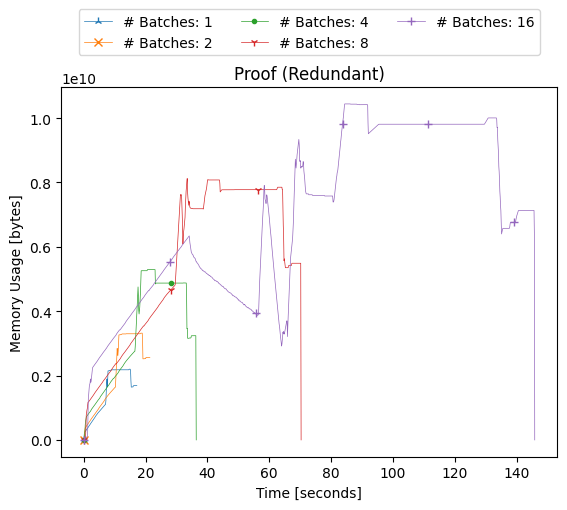

In [18]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/iterative/{}/measurements/{}{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "proof", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "proof", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "proof", 3), header=None)
    
    times = df2[0]
    memory = round(df2[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=250, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("sum/iterative/proof.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Proof (Redundant)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

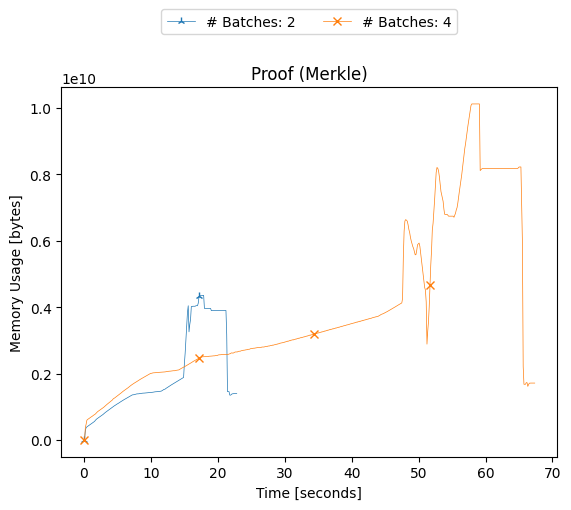

In [19]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/merkle/{}/measurements/{}{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "proof", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "proof", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "proof", 3), header=None)
    
    times = df1[0]
    memory = round(df1[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=150, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("sum/merkle/proof.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Proof (Merkle)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

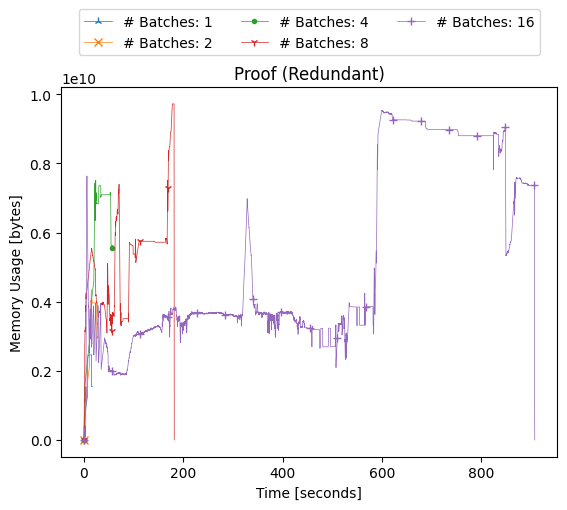

In [20]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "min/iterative/{}/measurements/{}{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "proof", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "proof", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "proof", 3), header=None)
    
    times = df1[0]
    memory = round(df1[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=500, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("min/iterative/proof.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Proof (Redundant)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

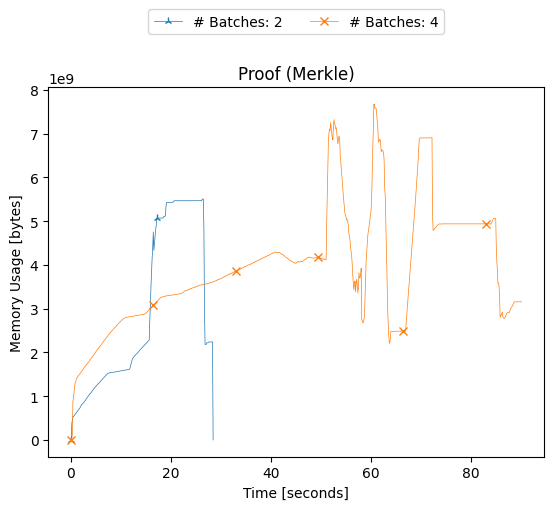

In [21]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "min/merkle/{}/measurements/{}{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "proof", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "proof", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "proof", 3), header=None)
    
    times = df1[0]
    memory = round(df1[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=150, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("min/merkle/proof.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Proof (Merkle)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

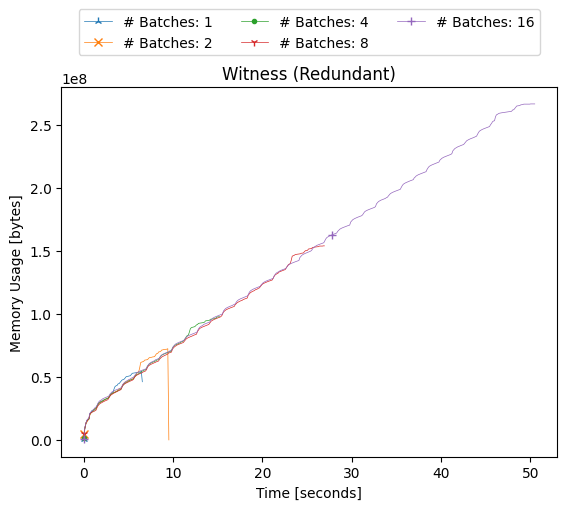

In [22]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/iterative/{}/measurements/{}{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "witness", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "witness", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "witness", 3), header=None)
    
    times = df2[0]
    memory = round(df2[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=250, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("sum/iterative/witness.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Witness (Redundant)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

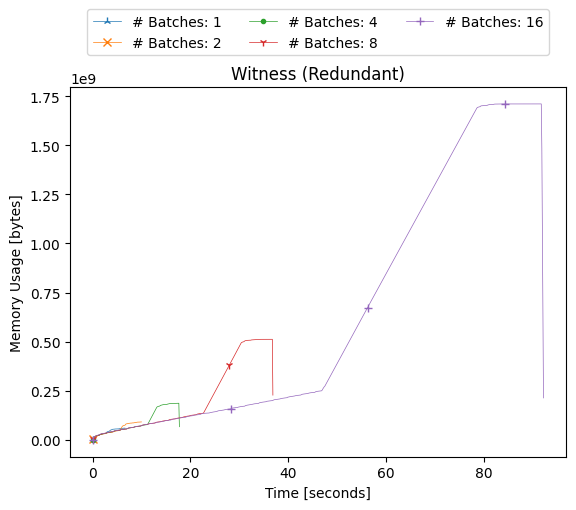

In [23]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "min/iterative/{}/measurements/{}{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "witness", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "witness", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "witness", 3), header=None)
    
    times = df2[0]
    memory = round(df2[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=250, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("min/iterative/witness.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Witness (Redundant)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

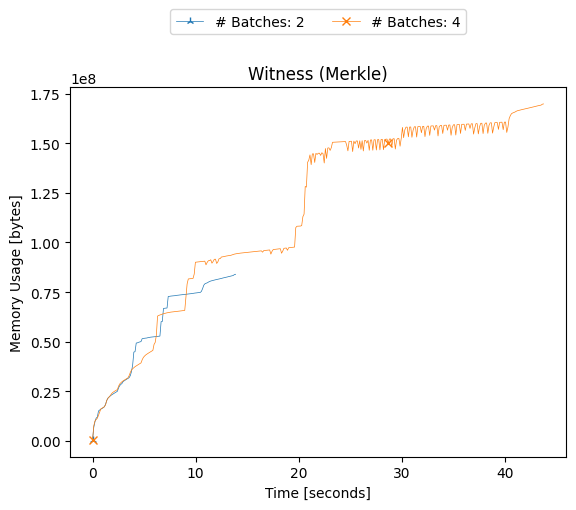

In [24]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "sum/merkle/{}/measurements/{}{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "witness", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "witness", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "witness", 3), header=None)
    
    times = df2[0]
    memory = round(df2[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=250, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("sum/merkle/witness.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Witness (Merkle)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

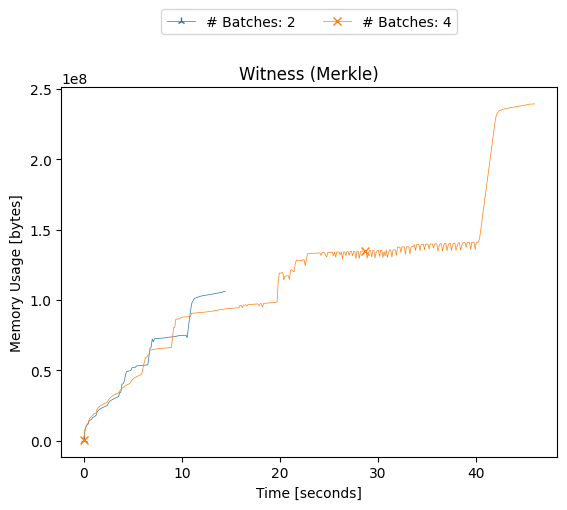

In [25]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

path = "min/merkle/{}/measurements/{}{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]
marker = ["2", "x", ".", "1", "+"]

plt.xlabel("Time [seconds]")
plt.ylabel("Memory Usage [bytes]")
for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], "witness", 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], "witness", 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], "witness", 3), header=None)
    
    times = df2[0]
    memory = round(df2[1] * 1024,3)
    plt.plot([time/1000 for time in times], memory, linestyle="-", marker=marker[index], linewidth=0.5, markevery=250, label="# Batches: {}".format(batch_numbers[index]))

with PdfPages("min/merkle/witness.pdf") as pdf:        
    plt.legend(bbox_to_anchor=(0.5, 1.23), loc='upper center', ncols=3)
    plt.title('Witness (Merkle)')
    pdf.savefig(bbox_inches="tight")
    plt.show()

In [36]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "variance/iterative/{}/measurements/compilation{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("variance/iterative/variance.txt")
    
summary["compile_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["compile_time_std"] = time_std
summary["compiled_size"] = [item[:-1] for item in summary["compiled_size"]]
    
display(np.transpose(summary))

constraints = " & ".join(str(v) for v in summary["constraints"].tolist()) + " & 0 &"
compile_time = " & ".join(str(v) for v in summary["compile_time"].tolist()) + " & 0 &"
compile_time_std = " & ".join(str(v) for v in summary["compile_time_std"].tolist()) + " & 0 &"
compile_memory = " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 &"
compile_memory_std = " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 &"
compile_size = " & ".join(str(v) for v in summary["compiled_size"].tolist()) + " & 0 &"

path = "variance/merkle/{}/measurements/compilation{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("variance/merkle/variance.txt")
    
summary["compile_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["compile_time_std"] = time_std
summary["compiled_size"] = [item[:-1] for item in summary["compiled_size"]]

constraints = "& Constraints [\#] & " + constraints + " & ".join(str(v) for v in summary["constraints"].tolist()) + " & 0 & 0 \\\\"
compile_time = "& Compile Time [s] & " + compile_time + " & ".join(str(v) for v in summary["compile_time"].tolist()) + " & 0 & 0 \\\\"
compile_time_std = "& STD [s] & " + compile_time_std + " & ".join(str(v) for v in summary["compile_time_std"].tolist()) + " & 0 & 0 \\\\"
compile_memory = "& Max Memory [GB] & " + compile_memory + " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 & 0 \\\\"
compile_memory_std = "& STD [GB] & " + compile_memory_std + " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 & 0 \\\\"
compile_size = "& R1CS Size [GB] & " + compile_size + " & ".join(str(v) for v in summary["compiled_size"].tolist()) + " & 0 & 0 \\\\"

print(constraints)
print(compile_time)
print(compile_time_std)
print(compile_memory)
print(compile_memory_std)
print(compile_size)

,0,1,2,3,4
proof,1,2,4,8,16
timestamp,1680872828,1680873046,1680873361,1680873897,1680875178
constraints,278581,450846,795374,1484428,2862534
deployment_gas,1172902,1378507,1789895,2613005,4258821
compiled_size,1.1,1.6,2.5,4.5,8.3
proving_key_size,117M,169M,305M,578M,1.1G
verification_key_size,4.0K,8.0K,8.0K,16K,24K
verifier_size,12K,16K,20K,24K,36K
compiled_verifier,5.062,5.99,7.849,11.566,19.0
compile_time,15.039,22.281,36.27,70.059,223.531


& Constraints [\#] & 278581 & 450846 & 795374 & 1484428 & 2862534 & 0 &417206 & 701654 & 0 & 0 \\
& Compile Time [s] & 15.039 & 22.281 & 36.27 & 70.059 & 223.531 & 0 &36.539 & 194.761 & 0 & 0 \\
& STD [s] & 0.009 & 0.119 & 0.05 & 0.546 & 0.753 & 0 &0.279 & 2.069 & 0 & 0 \\
& Max Memory [GB] & 3.861 & 5.759 & 9.277 & 12.489 & 12.552 & 0 &8.618 & 12.528 & 0 & 0 \\
& STD [GB] & 0.02 & 0.056 & 0.045 & 0.345 & 0.247 & 0 &0.067 & 0.187 & 0 & 0 \\
& R1CS Size [GB] & 1.1 & 1.6 & 2.5 & 4.5 & 8.3 & 0 &2.7 & 8.5 & 0 & 0 \\


In [63]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "max/iterative/{}/measurements/setup{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("max/iterative/max.txt")
    
summary["setup_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["setup_time_std"] = time_std
summary["proving_key_size"] = [item[:-1] for item in summary["proving_key_size"]]
summary["proving_key_size"] = [item if "." in item else int(item)/1000 for item in summary["proving_key_size"]]
summary["verification_key_size"] = [item[:-1] for item in summary["verification_key_size"]]
    
display(np.transpose(summary))

setup_time = " & ".join(str(v) for v in summary["setup_time"].tolist()) + " & 0 & "
setup_time_std = " & ".join(str(v) for v in summary["setup_time_std"].tolist()) + " & 0 & "
setup_memory = " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 & "
setup_memory_std = " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 & "
pk_key = " & ".join(str(v) for v in summary["proving_key_size"].tolist()) + " & 0 & "
vk_key = " & ".join(str(v) for v in summary["verification_key_size"].tolist()) + " & 0 & "

path = "max/merkle/{}/measurements/setup{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("max/merkle/max.txt")
    
summary["setup_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["setup_time_std"] = time_std
summary["proving_key_size"] = [item[:-1] for item in summary["proving_key_size"]]
summary["proving_key_size"] = [item if "." in item else int(item)/1000 for item in summary["proving_key_size"]]
summary["verification_key_size"] = [item[:-1] for item in summary["verification_key_size"]]

setup_time = "& Setup Time [s] & " + setup_time + " & ".join(str(v) for v in summary["setup_time"].tolist()) + " & 0 & 0 \\\\"
setup_time_std = "& STD [s] & " + setup_time_std + " & ".join(str(v) for v in summary["setup_time_std"].tolist()) + " & 0 & 0 \\\\"
setup_memory = "& Max Memory [GB] & " + setup_memory + " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 & 0 \\\\"
setup_memory_std = "& STD [GB] & " + setup_memory_std + " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 & 0 \\\\"
pk_key = "& Proving Key Size [GB] & " + pk_key + " & ".join(str(v) for v in summary["proving_key_size"].tolist()) + " & 0 & 0 \\\\"
vk_key = "& Verification Key Size [KB] & " + vk_key + " & ".join(str(v) for v in summary["verification_key_size"].tolist()) + " & 0 & 0 \\\\"

print(setup_time)
print(setup_time_std)
print(setup_memory)
print(setup_memory_std)
print(pk_key)
print(vk_key)

,0,1,2,3,4
proof,1,2,4,8,16
timestamp,1680686995,1680687341,1680687873,1680688832,1680691436
constraints,282517,459164,812458,1519046,2932222
deployment_gas,1172674,1378027,1789535,2613197,4258725
compiled_size,1.1G,1.6G,2.6G,4.5G,8.3G
proving_key_size,0.118,0.171,0.31,0.589,1.1
verification_key_size,4.0,8.0,8.0,16,24
verifier_size,12K,16K,20K,24K,36K
compiled_verifier,5.061,5.988,7.847,11.567,19.0
setup_time,23.478,32.504,53.14,96.823,187.896


& Setup Time [s] & 23.478 & 32.504 & 53.14 & 96.823 & 187.896 & 0 & 30.37 & 80.82 & 0 & 0 \\
& STD [s] & 0.606 & 0.153 & 0.872 & 1.844 & 1.347 & 0 & 0.058 & 0.208 & 0 & 0 \\
& Max Memory [GB] & 2.032 & 2.883 & 4.652 & 8.063 & 10.685 & 0 & 4.283 & 10.178 & 0 & 0 \\
& STD [GB] & 0.064 & 0.061 & 0.068 & 0.007 & 0.001 & 0 & 0.067 & 0.319 & 0 & 0 \\
& Proving Key Size [GB] & 0.118 & 0.171 & 0.31 & 0.589 & 1.1 & 0 & 0.161 & 0.282 & 0 & 0 \\
& Verification Key Size [KB] & 4.0 & 8.0 & 8.0 & 16 & 24 & 0 & 4.0 & 4.0 & 0 & 0 \\


In [64]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "max/iterative/{}/measurements/witness{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("max/iterative/max.txt")
    
summary["witness_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["witness_time_std"] = time_std
    
display(np.transpose(summary))

witness_time = " & ".join(str(v) for v in summary["witness_time"].tolist()) + " & 0 &"
witness_time_std = " & ".join(str(v) for v in summary["witness_time_std"].tolist()) + " & 0 &"
witness_memory = " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 &"
witness_memory_std = " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 &"

path = "max/merkle/{}/measurements/witness{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("max/merkle/max.txt")
    
summary["witness_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["witness_time_std"] = time_std

witness_time = "& Witness Time [s] & " + witness_time + " & ".join(str(v) for v in summary["witness_time"].tolist()) + " & 0 & 0 \\\\"
witness_time_std = "& STD [s] & " + witness_time_std + " & ".join(str(v) for v in summary["witness_time_std"].tolist()) + " & 0 & 0 \\\\"
witness_memory = "& Max Memory [GB] & " + witness_memory + " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 & 0 \\\\"
witness_memory_std = "& STD [GB] & " + witness_memory_std + " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 & 0 \\\\"

print(witness_time)
print(witness_time_std)
print(witness_memory)
print(witness_memory_std)

,0,1,2,3,4
proof,1,2,4,8,16
timestamp,1680686995,1680687341,1680687873,1680688832,1680691436
constraints,282517,459164,812458,1519046,2932222
deployment_gas,1172674,1378027,1789535,2613197,4258725
compiled_size,1.1G,1.6G,2.6G,4.5G,8.3G
proving_key_size,118M,171M,310M,589M,1.1G
verification_key_size,4.0K,8.0K,8.0K,16K,24K
verifier_size,12K,16K,20K,24K,36K
compiled_verifier,5.061,5.988,7.847,11.567,19.0
witness_time,6.491,9.403,15.278,27.05,51.537


& Witness Time [s] & 6.491 & 9.403 & 15.278 & 27.05 & 51.537 & 0 &13.929 & 43.811 & 0 & 0 \\
& STD [s] & 0.047 & 0.015 & 0.041 & 0.077 & 0.279 & 0 &0.051 & 0.095 & 0 & 0 \\
& Max Memory [GB] & 0.055 & 0.07 & 0.099 & 0.157 & 0.274 & 0 &0.089 & 0.155 & 0 & 0 \\
& STD [GB] & 0.002 & 0.002 & 0.001 & 0.001 & 0.002 & 0 &0.003 & 0.005 & 0 & 0 \\


In [65]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "max/iterative/{}/measurements/proof{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("max/iterative/max.txt")
    
summary["proof_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["proof_time_std"] = time_std
    
display(np.transpose(summary))

proof_time = " & ".join(str(v) for v in summary["proof_time"].tolist()) + " & 0 &"
proof_time_std = " & ".join(str(v) for v in summary["proof_time_std"].tolist()) + " & 0 &"
proof_memory = " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 &"
proof_memory_std = " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 &"

path = "max/merkle/{}/measurements/proof{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("max/merkle/max.txt")
    
summary["proof_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["proof_time_std"] = time_std

proof_time = "& Proof Time [s] & " + proof_time + " & ".join(str(v) for v in summary["proof_time"].tolist()) + " & 0 & 0 \\\\"
proof_time_std = "& STD [s] & " + proof_time_std + " & ".join(str(v) for v in summary["proof_time_std"].tolist()) + " & 0 & 0 \\\\"
proof_memory = "& Max Memory [GB] & " + proof_memory + " & ".join(str(v) for v in summary["max_mem"].tolist()) + " & 0 & 0 \\\\"
proof_memory_std = "& STD [GB] & " + proof_memory_std + " & ".join(str(v) for v in summary["max_mem_std"].tolist()) + " & 0 & 0 \\\\"

print(proof_time)
print(proof_time_std)
print(proof_memory)
print(proof_memory_std)

,0,1,2,3,4
proof,1,2,4,8,16
timestamp,1680686995,1680687341,1680687873,1680688832,1680691436
constraints,282517,459164,812458,1519046,2932222
deployment_gas,1172674,1378027,1789535,2613197,4258725
compiled_size,1.1G,1.6G,2.6G,4.5G,8.3G
proving_key_size,118M,171M,310M,589M,1.1G
verification_key_size,4.0K,8.0K,8.0K,16K,24K
verifier_size,12K,16K,20K,24K,36K
compiled_verifier,5.061,5.988,7.847,11.567,19.0
proof_time,17.428,21.294,36.423,70.848,142.13


& Proof Time [s] & 17.428 & 21.294 & 36.423 & 70.848 & 142.13 & 0 &22.975 & 67.456 & 0 & 0 \\
& STD [s] & 0.06 & 0.129 & 0.06 & 0.032 & 6.597 & 0 &0.028 & 0.112 & 0 & 0 \\
& Max Memory [GB] & 2.327 & 3.304 & 5.236 & 8.328 & 9.841 & 0 &4.788 & 9.996 & 0 & 0 \\
& STD [GB] & 0.103 & 0.058 & 0.034 & 0.059 & 0.593 & 0 &0.158 & 0.088 & 0 & 0 \\


In [40]:
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

path = "variance/iterative/{}/measurements/compilation{}.txt"
batch_sizes = [32, 64, 128, 256, 512]
batch_numbers = [1, 2, 4, 8, 16]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("variance/iterative/variance.txt")
    
summary["proof_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["proof_time_std"] = time_std
summary["verifier_size"] = [item[:-1] for item in summary["verifier_size"]]
summary["compiled_verifier"] = [round(float(item)*1.024, 3) for item in summary["compiled_verifier"]]
  
display(np.transpose(summary))

verifier = " & ".join(str(v) for v in summary["verifier_size"].tolist()) + " & 0 & "
compiled_verifier = " & ".join(str(v) for v in summary["compiled_verifier"].tolist()) + " & 0 & "
gas = " & ".join(str(v) for v in summary["deployment_gas"].tolist()) + " & 0 & "

path = "variance/merkle/{}/measurements/compilation{}.txt"
batch_sizes = [64, 128]
batch_numbers = [2, 4]

max_all = []
avg_all = []
std_max = []
std_avg = []
time_all = []
time_std = []

for index, batch_size in enumerate(batch_sizes):
    df1 = pd.read_csv(path.format(batch_numbers[index], 1), header=None)
    df2 = pd.read_csv(path.format(batch_numbers[index], 2), header=None)
    df3 = pd.read_csv(path.format(batch_numbers[index], 3), header=None)
    
    max1 = round(np.max(df1[1] * 1.024e-6),3)
    max2 = round(np.max(df2[1] * 1.024e-6),3)
    max3 = round(np.max(df3[1] * 1.024e-6),3)
    
    max_all.append(round((max1 + max2 + max3) / 3, 3))
    
    avg1 = round(np.average(df1[1] * 1.024e-6),3)
    avg2 = round(np.average(df2[1] * 1.024e-6),3)
    avg3 = round(np.average(df3[1] * 1.024e-6),3)
    
    avg_all.append(round((avg1 + avg2 + avg3) / 3, 3))
    
    std_max.append(round(np.std([max1, max2, max3]), 3))
    
    std_avg.append(round(np.std([avg1, avg2, avg3]), 3))
    
    time1 = round(df1[0].iloc[-1] / 1000, 3)
    time2 = round(df2[0].iloc[-1] / 1000, 3)
    time3 = round(df3[0].iloc[-1] / 1000, 3)
    
    time_all.append(round((time1 + time2 + time3) / 3, 3))
    time_std.append(round(np.std([time1,time2,time3]), 3))
    
summary = pd.read_csv("variance/merkle/variance.txt")
    
summary["proof_time"] = time_all
summary["max_mem"] = max_all
summary["max_mem_std"] = std_max
summary["avg_mem"] = avg_all
summary["avg_mem_std"] = std_avg
summary["proof_time_std"] = time_std
summary["verifier_size"] = [item[:-1] for item in summary["verifier_size"]]
summary["compiled_verifier"] = [round(float(item)*1.024, 3) for item in summary["compiled_verifier"]]

verifier = "& Verifier [KB] & " + verifier + " & ".join(str(v) for v in summary["verifier_size"].tolist()) + " & 0 & 0 \\\\"
compiled_verifier = "& Compiled Verifier [KB] & " + compiled_verifier + " & ".join(str(v) for v in summary["compiled_verifier"].tolist()) + " & 0 & 0 \\\\"
gas = "& Transaction Cost [Gas] & " + gas + " & ".join(str(v) for v in summary["deployment_gas"].tolist()) + " & 0 & 0 \\\\"

print(verifier)
print(compiled_verifier)
print(gas)


,0,1,2,3,4
proof,1,2,4,8,16
timestamp,1680872828,1680873046,1680873361,1680873897,1680875178
constraints,278581,450846,795374,1484428,2862534
deployment_gas,1172902,1378507,1789895,2613005,4258821
compiled_size,1.1G,1.6G,2.5G,4.5G,8.3G
proving_key_size,117M,169M,305M,578M,1.1G
verification_key_size,4.0K,8.0K,8.0K,16K,24K
verifier_size,12,16,20,24,36
compiled_verifier,5.183,6.134,8.037,11.844,19.456
proof_time,15.039,22.281,36.27,70.059,223.531


& Verifier [KB] & 12 & 16 & 20 & 24 & 36 & 0 & 12 & 12 & 0 & 0 \\
& Compiled Verifier [KB] & 5.183 & 6.134 & 8.037 & 11.844 & 19.456 & 0 & 5.183 & 5.183 & 0 & 0 \\
& Transaction Cost [Gas] & 1172902 & 1378507 & 1789895 & 2613005 & 4258821 & 0 & 1172902 & 1172914 & 0 & 0 \\
